Models:

In [90]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


In [5]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.size
df.shape


(6362620, 11)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['nameOrig_encoded'] = le.fit_transform(df['nameOrig'])

In [8]:
chunk_size = 10000
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk_dummies = pd.get_dummies(chunk, columns=["isFraud", "nameOrig"], drop_first=True)
    # Process the chunk_dummies here

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['nameOrig_encoded'] = le.fit_transform(df['nameOrig'])

In [10]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5090096, 11) (1272524, 11) (5090096,) (1272524,)


In [13]:
x_train
y_train
y_test
x_test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameOrig_encoded
4644207,330,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,137637
3800666,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,928558
4426240,322,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,1236646
5788765,401,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,3733761
2010701,180,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,5700339
...,...,...,...,...,...,...,...,...,...,...,...
3408852,255,CASH_OUT,78143.26,C1120811974,209723.00,131579.74,C1086113104,249352.15,327495.41,0,395853
2756286,212,PAYMENT,4972.33,C1768174401,0.00,0.00,M1206254417,0.00,0.00,0,2523093
3167668,238,CASH_OUT,13096.24,C1405678288,5638.00,0.00,C950153697,0.00,13096.24,0,1331870
3337309,253,CASH_OUT,96814.92,C876549511,0.00,0.00,C1459593753,1607329.85,1704144.76,0,5947934


Models:

Decision Tree 

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Example data
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'target': ['CASH_OUT', 'CASH_IN', 'CASH_OUT', 'CASH_IN']
}
df = pd.DataFrame(data)

# Split data into features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print("Data Split:")
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Decision Tree Regressor
print("\nDecision Tree Regressor:")
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
print("Decision Tree Regressor Parameters:")
print(dtr.get_params())
dtr.fit(x_train, y_train_encoded)

Data Split:
x_train shape: (3, 2), x_test shape: (1, 2)
y_train shape: (3,), y_test shape: (1,)

Decision Tree Regressor:
Decision Tree Regressor Parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


DecisionTreeRegressor(max_depth=5, random_state=42)

In [53]:
dtr_predictions = dtr.predict(x_test)
dtr_predictions_rounded = dtr_predictions.round().astype(int)

# Evaluate Decision Tree Regressor
mse_dtr = mean_squared_error(y_test_encoded, dtr_predictions_rounded)
mae_dtr = mean_absolute_error(y_test_encoded, dtr_predictions_rounded)
r2_dtr = r2_score(y_test_encoded, dtr_predictions_rounded)

print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dtr:.2f}, MAE: {mae_dtr:.2f}, R2: {r2_dtr:.2f}")

Decision Tree Regressor Metrics:
MSE: 1.00, MAE: 1.00, R2: nan


Random Forest

In [54]:
# Random Forest Regressor
print("\nRandom Forest Regressor:")
rfr = RandomForestRegressor(n_estimators=250, random_state=42)
print("Random Forest Regressor Parameters:")
print(rfr.get_params())
rfr.fit(x_train, y_train_encoded)


Random Forest Regressor:
Random Forest Regressor Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


RandomForestRegressor(n_estimators=250, random_state=42)

In [55]:
rfr_predictions = rfr.predict(x_test)
rfr_predictions_rounded = rfr_predictions.round().astype(int)

# Evaluate Random Forest Regressor
mse_rfr = mean_squared_error(y_test_encoded, rfr_predictions_rounded)
mae_rfr = mean_absolute_error(y_test_encoded, rfr_predictions_rounded)
r2_rfr = r2_score(y_test_encoded, rfr_predictions_rounded)

print("Random Forest Regressor Metrics:")
print(f"MSE: {mse_rfr:.2f}, MAE: {mae_rfr:.2f}, R2: {r2_rfr:.2f}")


Random Forest Regressor Metrics:
MSE: 1.00, MAE: 1.00, R2: nan


Linear regressor

In [70]:
# Linear Regression
print("\nLinear Regression:")
lr = LinearRegression(n_jobs= 250)
print("Linear Regression Parameters:")
print(lr.get_params())
lr.fit(x_train, y_train_encoded)


Linear Regression:
Linear Regression Parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 250, 'positive': False}


LinearRegression(n_jobs=250)

In [68]:
lr_predictions = lr.predict(x_test)
lr_predictions_rounded = lr_predictions.round().astype(int)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test_encoded, lr_predictions_rounded)
mae_lr = mean_absolute_error(y_test_encoded, lr_predictions_rounded)
r2_lr = r2_score(y_test_encoded, lr_predictions_rounded)

print("Linear Regression Metrics:")
print(f"MSE: {mse_lr:.2f}, MAE: {mae_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression Metrics:
MSE: 1.00, MAE: 1.00, R2: nan


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
                             confusion_matrix, accuracy_score, precision_score, 
                             recall_score, roc_auc_score)

# Example data
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'target': ['CASH_OUT', 'CASH_IN', 'CASH_OUT', 'CASH_IN']
}
df = pd.DataFrame(data)

# Split data into features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=250, random_state=42)
rfc.fit(x_train, y_train_encoded)

# Predictions on training and testing sets
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

# Calculate metrics for training data
cfm_train_rf = confusion_matrix(y_train_encoded, y_train_pred)
acs_train_rf = accuracy_score(y_train_encoded, y_train_pred)
pcs_train_rf = precision_score(y_train_encoded, y_train_pred, average='macro')
rcs_train_rf = recall_score(y_train_encoded, y_train_pred, average='macro')

# Calculate metrics for testing data
cfm_test_rf = confusion_matrix(y_test_encoded, y_test_pred)
acs_test_rf = accuracy_score(y_test_encoded, y_test_pred)
pcs_test_rf = precision_score(y_test_encoded, y_test_pred, average='macro')
rcs_test_rf = recall_score(y_test_encoded, y_test_pred, average='macro')

# Print results
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\n------------------------------------------------------")


Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1 0]
 [0 2]]

Accuracy Score (Training Data): 1.0

Precision Score (Training Data): 1.0

Recall Score (Training Data): 1.0

------------------------------------------------------


In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import LabelEncoder

# Example data
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'target': ['CASH_OUT', 'CASH_IN', 'CASH_OUT', 'CASH_IN']
}
df = pd.DataFrame(data)

# Split data into features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Add a constant to the independent value
x_train_sm = sm.add_constant(X)

# Suppress the warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fit the model
model = sm.OLS(y_encoded, x_train_sm).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                 -0.200
Method:                 Least Squares   F-statistic:                    0.5000
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.553
Time:                        16:32:36   Log-Likelihood:                -2.4569
No. Observations:                   4   AIC:                             8.914
Df Residuals:                       2   BIC:                             7.686
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1556      0.146      1.067      0.3

C:\Users\bansh\anaconda3\anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [83]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Example data
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'target': [1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Split data into features and target
X = df [['feature1', 'feature2']]
y = df['target']

# Add a constant to the independent value
x_train_sm = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, x_train_sm).fit()

# Make predictions
predictions = model.predict(x_train_sm)

# Print the predictions
print(predictions)

0    0.8
1    0.6
2    0.4
3    0.2
dtype: float64


In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example data
data = {
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'target': [1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Split data into features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Add a constant to the independent value
x_train_sm = sm.add_constant(X)

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif["features"] = x_train_sm.columns

# Print the VIF for each independent variable
print(vif)

   VIF Factor  features
0         0.0     const
1         inf  feature1
2         inf  feature2


In [86]:
from sklearn.linear_model import Ridge

# Fit the model with ridge regression
model_ridge = Ridge(alpha=1.0).fit(X, y)

# Print the coefficients
print(model_ridge.coef_)

[-0.09090909 -0.09090909]


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  4 non-null      int64
 1   feature2  4 non-null      int64
 2   target    4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


<Axes: xlabel='feature1'>

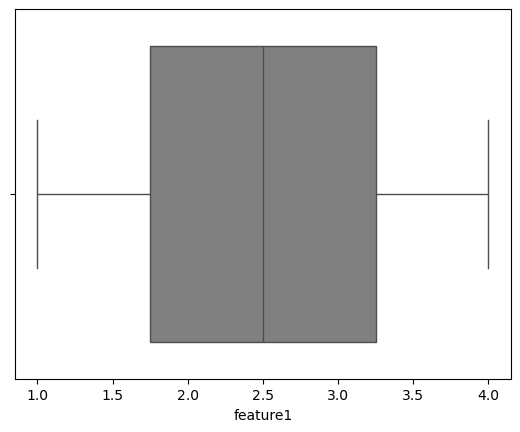

In [95]:
sns.boxplot(x = df['feature1'],color = 'grey')

<Axes: xlabel='feature2'>

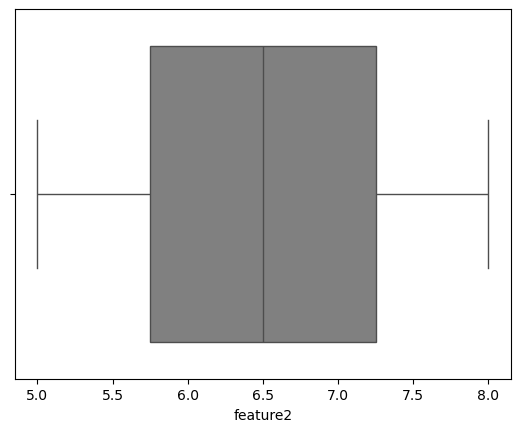

In [97]:
sns.boxplot(x = df['feature2'],color = 'grey')

<Axes: xlabel='target'>

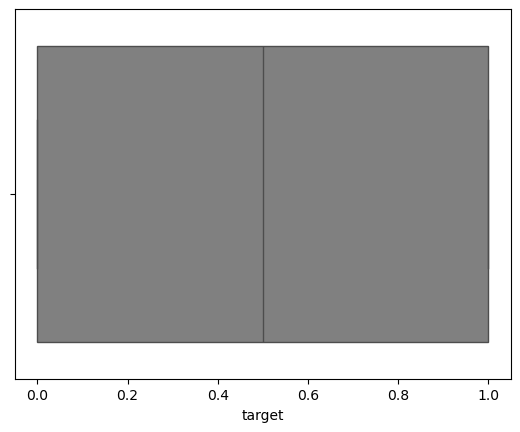

In [98]:
sns.boxplot(x = df['target'],color = 'grey')

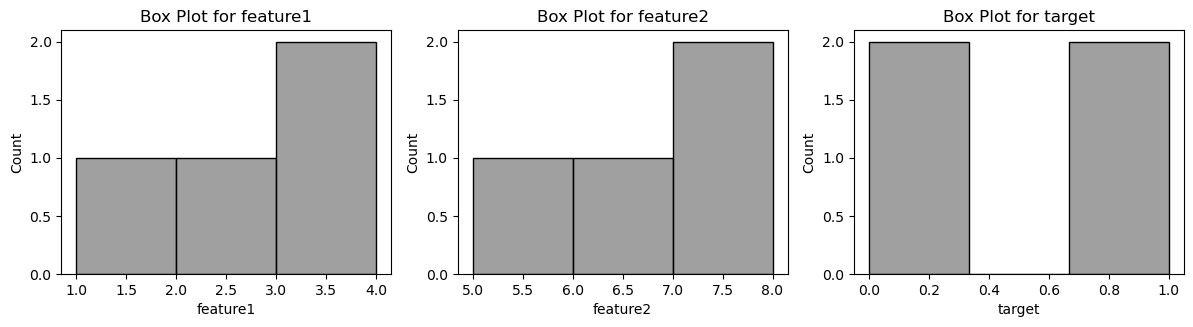

In [96]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:16]):
    plt.subplot(4, 4, i+1)
    sns.histplot(x=df[col], color='grey') 
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

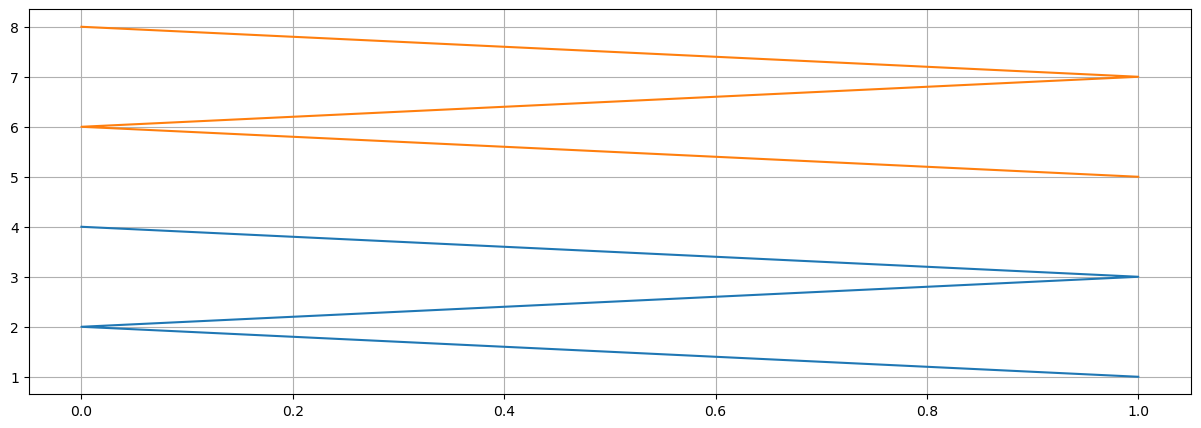

In [99]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['target'], df[['feature1','feature2']])
plt.grid();

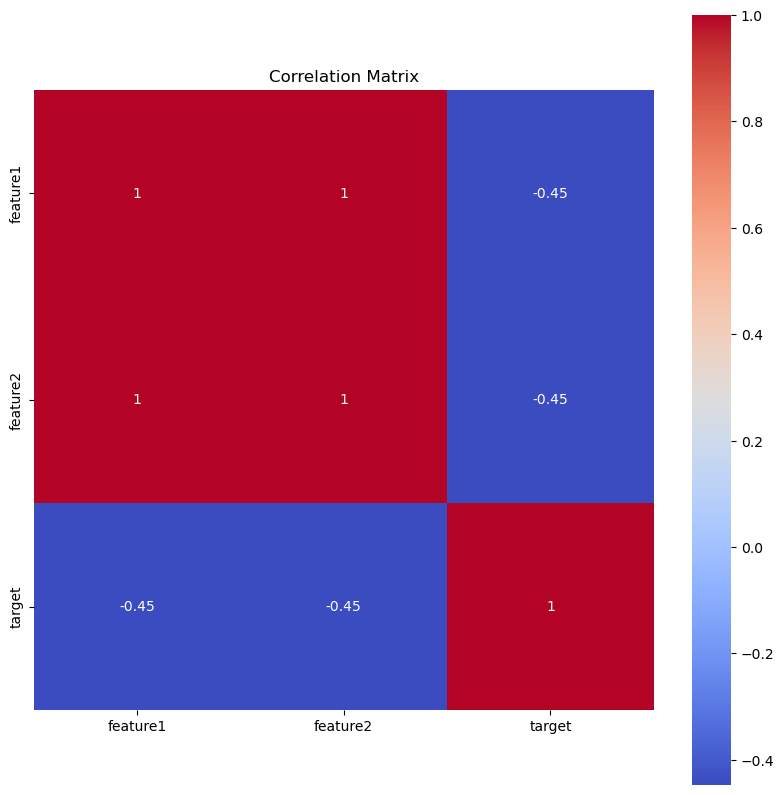

In [101]:
chunk_size = 10000
corr_matrices = []
for i in range(0, df.shape[0], chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    numeric_cols = chunk.select_dtypes(include=[np.number]).columns
    corr_chunk = chunk[numeric_cols].corr()
    corr_matrices.append(corr_chunk)
corr_matrix = pd.concat(corr_matrices, axis=0)
corr_matrix = corr_matrix.groupby(corr_matrix.index).mean()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

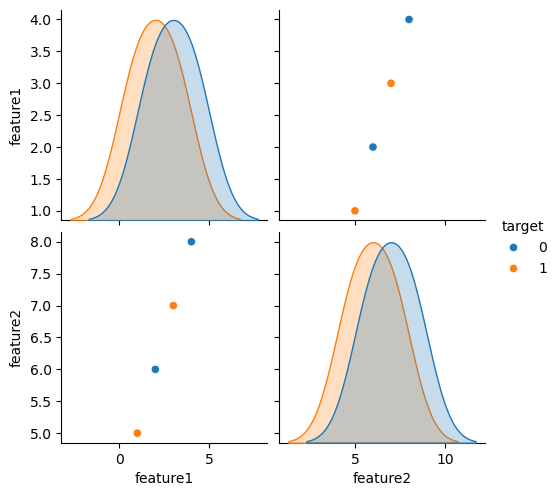

In [103]:
sns.pairplot(df, vars=['feature1', 'feature2'], hue='target')
plt.show()

<Axes: ylabel='count'>

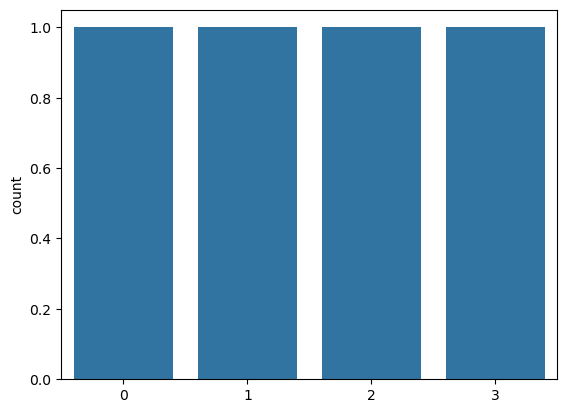

In [104]:
sns.countplot(data=df.target)

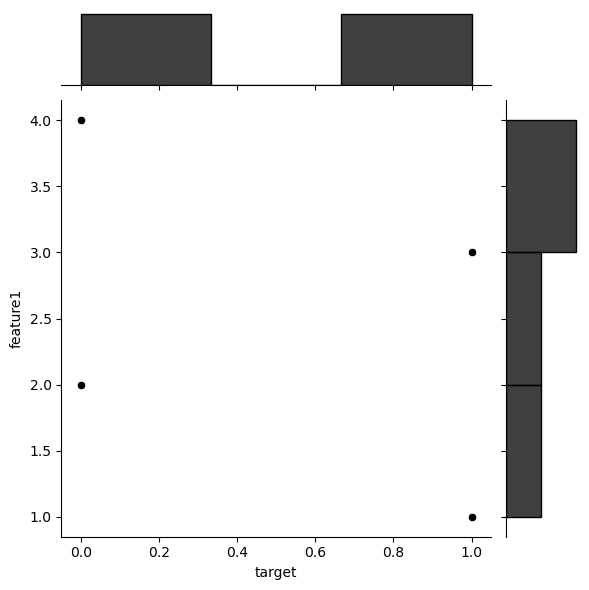

In [106]:
sns.jointplot(x = df['target'], y= df['feature1'],color = 'Black')

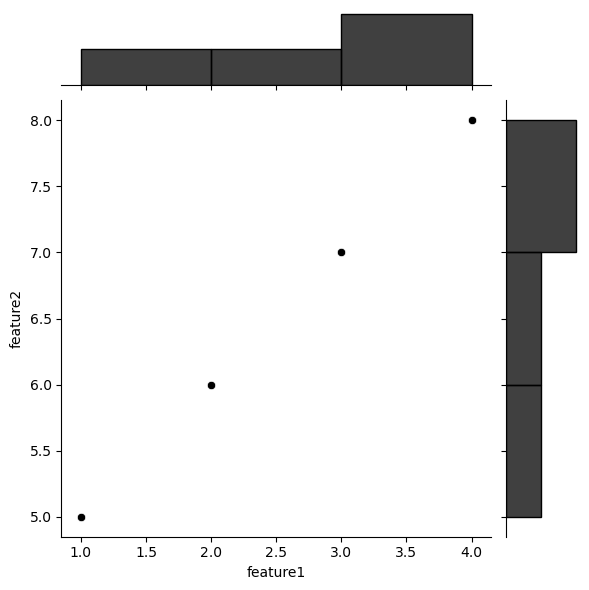

In [109]:
sns.jointplot(x = df['feature1'], y= df['feature2'],color = 'Black')

7. What kind of prevention should be adopted while company update its infrastructure?

To prevent fraudulent transactions, the company should adopt the following prevention measures:

Real-time transaction monitoring: Monitor transactions in real-time to detect and prevent fraudulent transactions
IP blocking: Block transactions from known fraudulent IP addresses
Device fingerprinting: Use device fingerprinting to identify and block transactions from known fraudulent devices
Customer verification: Verify customer identities and addresses to prevent fraudulent transactions
Transaction limits: Set transaction limits to prevent large fraudulent transactions




8. Assuming these actions have been implemented, how would you determine if they work?

To determine if these actions are effective, I would:

Monitor transaction data: Continuously monitor transaction data to detect any changes in fraudulent transaction patterns
Evaluate model performance: Continuously evaluate the performance of the fraud detection model to ensure that it is detecting fraudulent transactions accurately
Con duct A/B testing: Conduct A/B testing to compare the performance of the fraud detection model with and without the prevention measures
Analyze customer feedback: Analyze customer feedback to identify any issues or concerns with the prevention measures
Review fraud detection metrics: Continuously review fraud detection metrics such as accuracy, precision, recall, and F1-score to ensure that the prevention measures are effective.






FINISH